# Clustering Algorithms: k-means and DBSCAN
## k-means

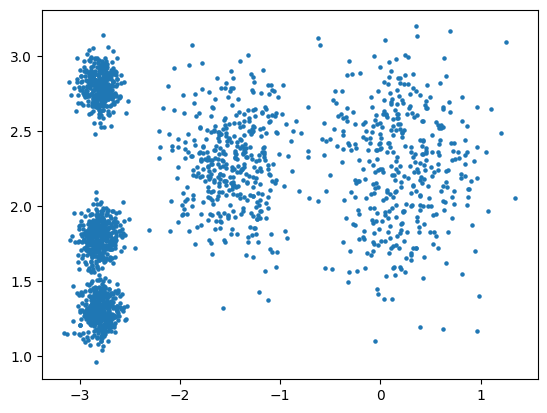

In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8], [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

plt.scatter(X[:,0], X[:,1], s=5)
plt.show()

In [2]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
y_pred = kmeans.fit_predict(X)

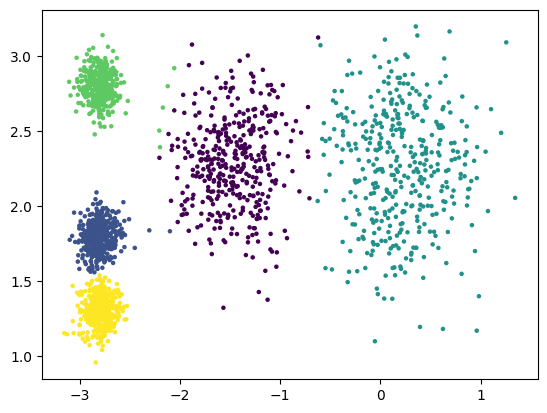

In [3]:
plt.scatter(X[:,0], X[:,1], c=y_pred, s=5)
plt.show()

In [4]:
y_pred

array([4, 1, 2, ..., 3, 2, 1])

In [5]:
kmeans.cluster_centers_

array([[-1.46679593,  2.28585348],
       [-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [6]:
X_new = np.array([[0, 2], [-1.5, 2], [-3, 3], [-3, 2], [-3, 1]])
kmeans.predict(X_new)

array([2, 0, 3, 1, 4])

In [7]:
kmeans.transform(X_new).round(2)

array([[1.49, 2.81, 0.33, 2.9 , 2.89],
       [0.29, 1.32, 1.73, 1.52, 1.48],
       [1.69, 1.21, 3.29, 0.29, 1.71],
       [1.56, 0.28, 3.22, 0.82, 0.73],
       [2.  , 0.82, 3.45, 1.81, 0.36]])

### Centroid initialization methods

In [8]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

KMeans(init=array([[-3,  3],
       [-3,  2],
       [-3,  1],
       [-1,  2],
       [ 0,  2]]),
       n_clusters=5, n_init=1, random_state=42)

In [9]:
kmeans.inertia_

211.5985372581684

In [10]:
kmeans.score(X)

-211.5985372581684

### Accelerated k-means and mini-batch k-means

In [11]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

### Finding the optimal number of clusters

In [12]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.655517642572828

### Using Clustering for Image Segmentation

In [18]:
import urllib.request
from pathlib import Path

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
IMAGES_PATH = Path()
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [19]:
import PIL

image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

(426400, 3)


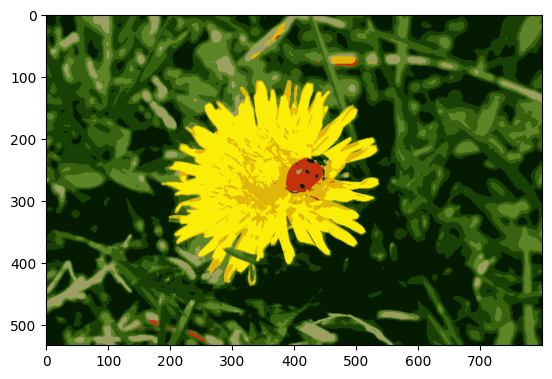

In [25]:
X = image.reshape(-1, 3)
print(X.shape)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

plt.imshow(segmented_img/255)
plt.show()

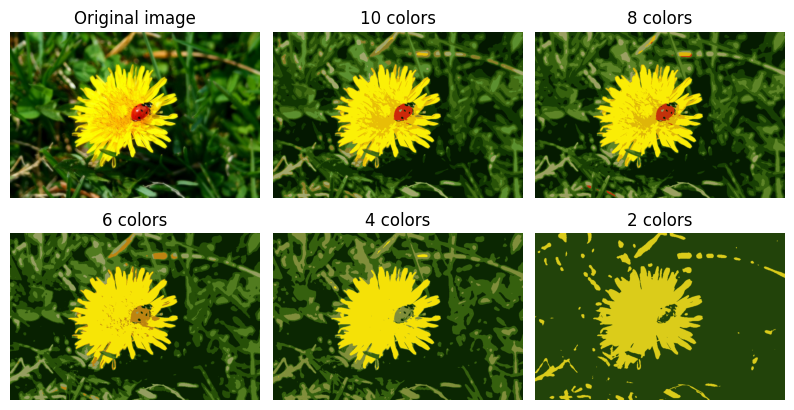

In [21]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

plt.figure(figsize=(10, 5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(2, 3, 2 + idx)
    plt.imshow(segmented_imgs[idx] / 255)
    plt.title(f"{n_clusters} colors")
    plt.axis('off')

plt.show()

### Using Clustering for Semi-Supervised Learning

In [26]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)
X_train, y_train = X_digits[:1400], y_digits[:1400]
X_test, y_test = X_digits[1400:], y_digits[1400:]

In [27]:
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(max_iter=10000)

In [28]:
log_reg.score(X_test, y_test)

0.7581863979848866

In [88]:
k = 50
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
# print(X_digits_dist.shape)
X_representative_digits = X_train[representative_digit_idx]

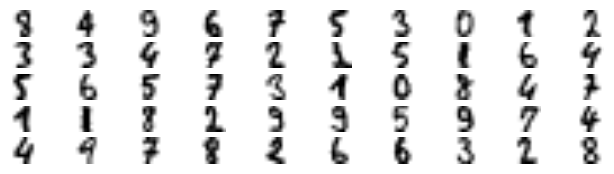

In [89]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary",
               interpolation="bilinear")
    plt.axis('off')

plt.show()

In [90]:
y_representative_digits = np.array([8, 4, 9, 6, 7, 5, 3, 0, 1, 2,
                                    3, 3, 4, 7, 2, 2, 5, 1, 6, 4,
                                    5, 6, 5, 7, 3, 1, 0, 8, 4, 7,
                                    1, 1, 8, 2, 9, 9, 5, 9, 7, 4,
                                    4, 9, 7, 8, 2, 6, 6, 3, 2, 8])

In [91]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.8438287153652393

In [92]:
y_train_propagated = np.empty(len(X_train), dtype=np.int64)

for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

In [93]:
log_reg = LogisticRegression(max_iter=5000)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.8614609571788413

In [94]:
percentile_closest = 99
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
(kmeans.labels_ == 1)

array([False, False, False, ..., False, False, False])

In [95]:
percentile_closest = 99
X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]

for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [96]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.853904282115869

In [97]:
(y_train_partially_propagated == y_train[partially_propagated]).mean()

0.9355555555555556

## DBSCAN